In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Chapter 7 - Resampling and Interpolation

In [23]:
from datetime import datetime

# Load the CSV without parsing dates
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
df = pd.read_csv(url)

# Convert 'Month' column to datetime using custom parser
df['Month'] = pd.to_datetime('190' + df['Month'], format='%Y-%m')

# Set it as the index
df.set_index('Month', inplace=True)

# Show result
df

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3
1901-06-01,168.5
1901-07-01,231.8
1901-08-01,224.5
1901-09-01,192.8


In [12]:
series1 = df['Sales']

# Resample the time series to daily frequency, using the mean to fill in each day
upsampled = series1.resample('D').mean()

upsampled.head(32)

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
Freq: D, Name: Sales, dtype: float64

In [35]:
interpolated = upsampled.interpolate(method='linear')

interpolated.head(32)

Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
1901-01-06    246.629032
1901-01-07    242.754839
1901-01-08    238.880645
1901-01-09    235.006452
1901-01-10    231.132258
1901-01-11    227.258065
1901-01-12    223.383871
1901-01-13    219.509677
1901-01-14    215.635484
1901-01-15    211.761290
1901-01-16    207.887097
1901-01-17    204.012903
1901-01-18    200.138710
1901-01-19    196.264516
1901-01-20    192.390323
1901-01-21    188.516129
1901-01-22    184.641935
1901-01-23    180.767742
1901-01-24    176.893548
1901-01-25    173.019355
1901-01-26    169.145161
1901-01-27    165.270968
1901-01-28    161.396774
1901-01-29    157.522581
1901-01-30    153.648387
1901-01-31    149.774194
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64

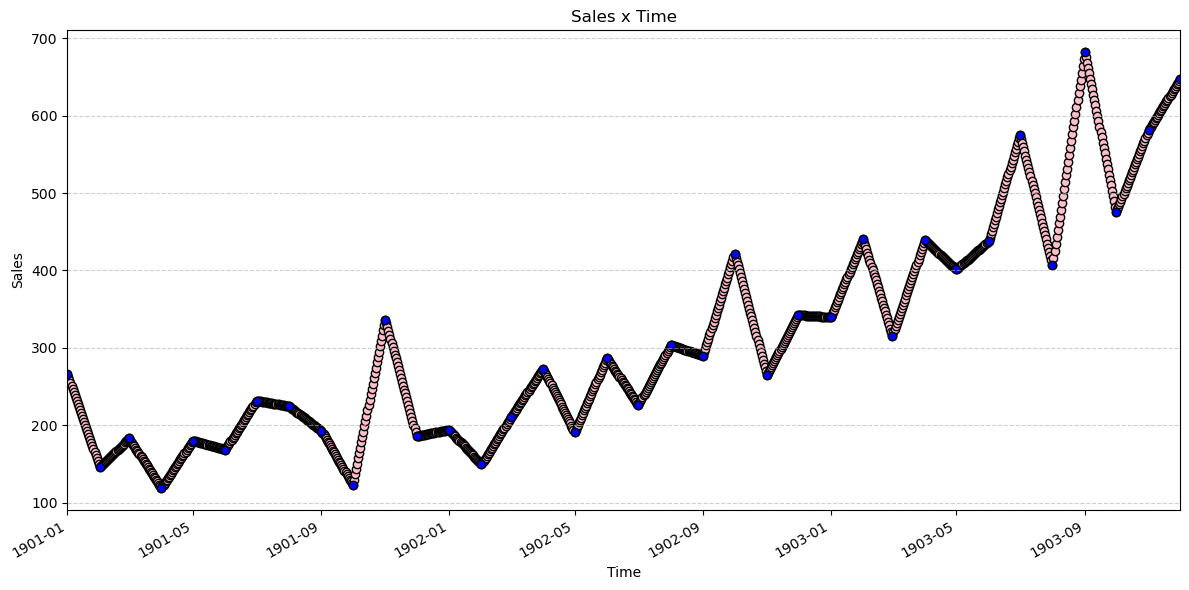

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(interpolated.index, interpolated.values, color='pink', edgecolors='black')
ax.scatter(series1.index, series1.values, color='blue', edgecolors='black')

ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.set_title('Sales x Time')
ax.set_xlim(pd.to_datetime('1901-01-01'), pd.to_datetime('1903-12-01'))
ax.grid(axis='y', linestyle='--', alpha=0.6)  

fig.autofmt_xdate()
plt.tight_layout()
plt.show();

In [41]:
polynomial = upsampled.interpolate(method='spline', order=2)

polynomial.head(32)

Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
1901-01-06    231.727880
1901-01-07    225.575149
1901-01-08    219.651553
1901-01-09    213.957094
1901-01-10    208.491770
1901-01-11    203.255582
1901-01-12    198.248529
1901-01-13    193.470612
1901-01-14    188.921831
1901-01-15    184.602185
1901-01-16    180.511676
1901-01-17    176.650301
1901-01-18    173.018063
1901-01-19    169.614960
1901-01-20    166.440993
1901-01-21    163.496161
1901-01-22    160.780465
1901-01-23    158.293905
1901-01-24    156.036481
1901-01-25    154.008192
1901-01-26    152.209039
1901-01-27    150.639021
1901-01-28    149.298139
1901-01-29    148.186393
1901-01-30    147.303783
1901-01-31    146.650308
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64

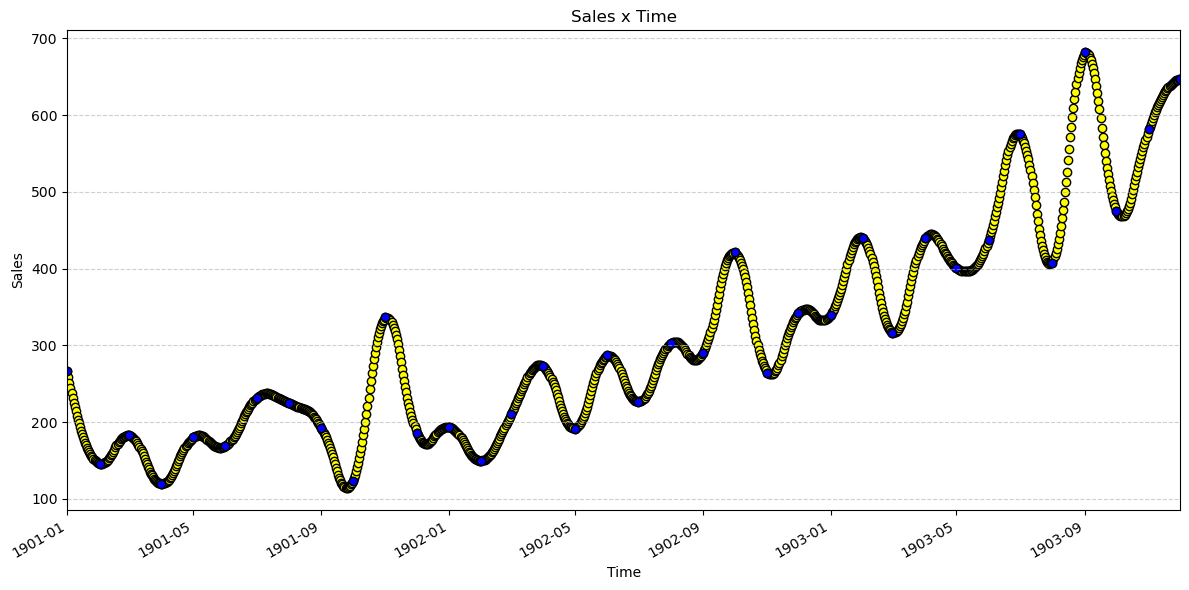

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(polynomial.index, polynomial.values, color='yellow', edgecolors='black')
ax.scatter(series1.index, series1.values, color='blue', edgecolors='black')

ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.set_title('Sales x Time')
ax.set_xlim(pd.to_datetime('1901-01-01'), pd.to_datetime('1903-12-01'))
ax.grid(axis='y', linestyle='--', alpha=0.6)  

fig.autofmt_xdate()
plt.tight_layout()
plt.show();

In [45]:
resample = series1.resample('QE')
quarterly_mean_sales = resample.mean()
quarterly_mean_sales

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
1902-06-30    250.566667
1902-09-30    273.166667
1902-12-31    342.800000
1903-03-31    365.333333
1903-06-30    426.000000
1903-09-30    555.033333
1903-12-31    567.833333
Freq: QE-DEC, Name: Sales, dtype: float64

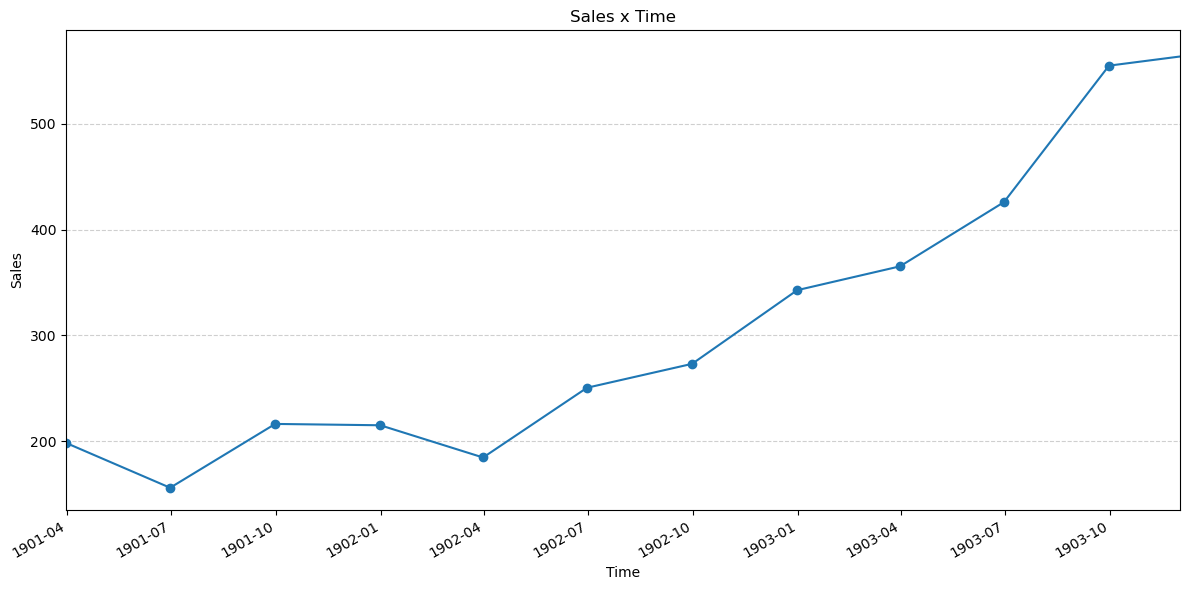

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(quarterly_mean_sales, marker='o')

ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.set_title('Sales x Time')
ax.set_xlim(pd.to_datetime('1901-03-31'), pd.to_datetime('1903-12-01'))
ax.grid(axis='y', linestyle='--', alpha=0.6)  

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [58]:
resample = series1.resample('YE')
yearly_mean_sales = resample.sum()
yearly_mean_sales

Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Freq: YE-DEC, Name: Sales, dtype: float64

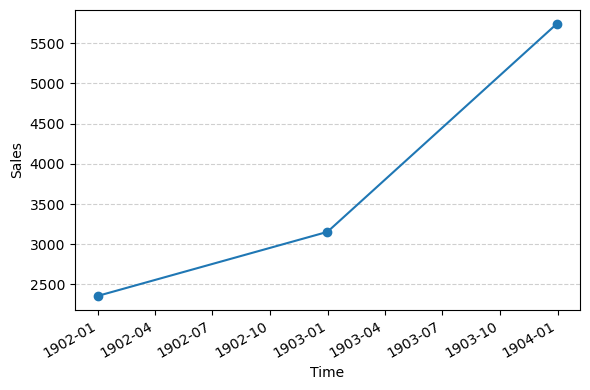

In [60]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(yearly_mean_sales, marker='o')

ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.grid(axis='y', linestyle='--', alpha=0.6)  
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/TimeSeriesForecastingInPython/refs/heads/master/data/air-passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


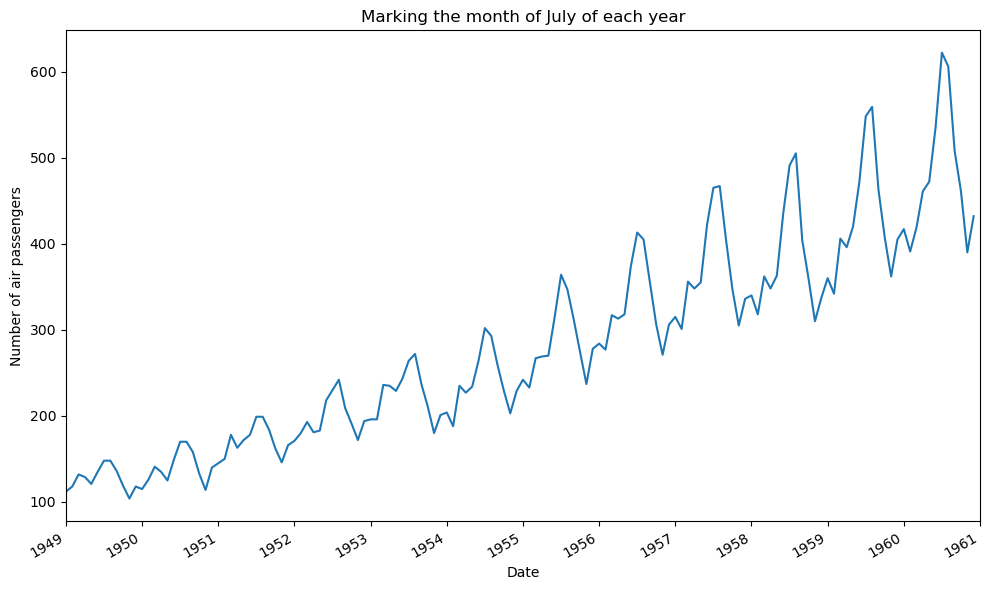

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df['Month'], df['Passengers'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
ax.set_title('Marking the month of July of each year')
ax.set_xlim(0, 143)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()
plt.show();

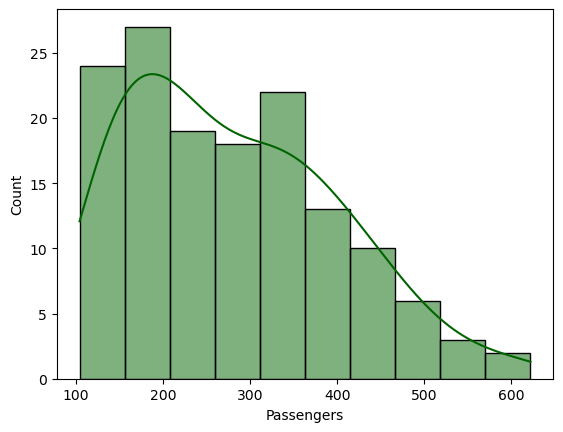

In [67]:
sns.histplot(df['Passengers'], bins=10, edgecolor='black', color='darkgreen', kde=True)
plt.show();

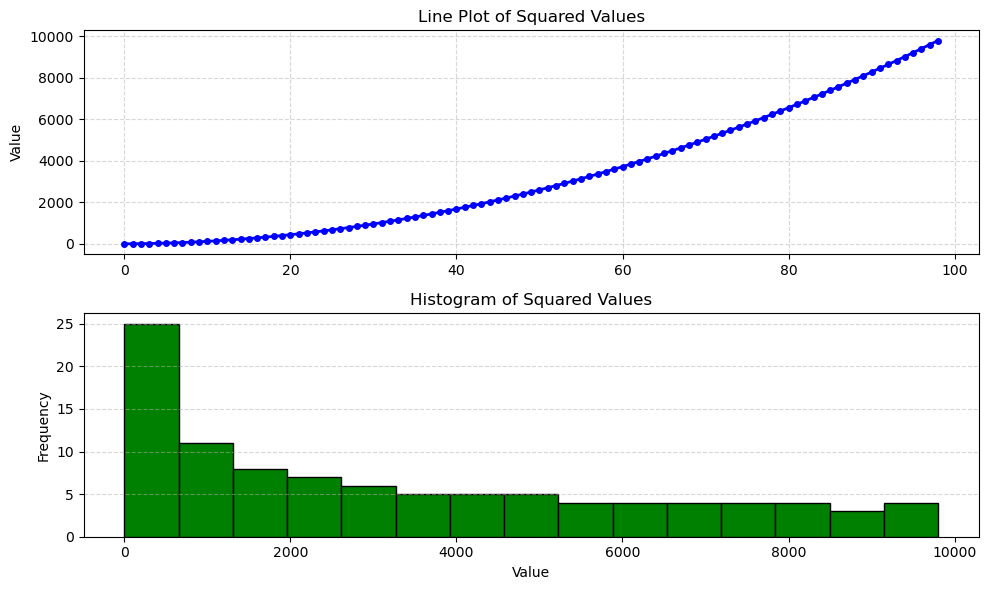

In [69]:
# Generate a synthetic series: squares from 1 to 99
series = [i**2 for i in range(1, 100)]

# Create the figure
plt.figure(figsize=(10, 6))  # Wider and taller plot

# Line plot (top)
plt.subplot(2, 1, 1)                       
plt.plot(series, color='blue', linewidth=2, marker='o', markersize=4)
plt.title('Line Plot of Squared Values')     
plt.ylabel('Value')                         
plt.grid(True, linestyle='--', alpha=0.5)    

# Histogram (bottom)
plt.subplot(2, 1, 2)                         
plt.hist(series, bins=15, color='green', edgecolor='black')
plt.title('Histogram of Squared Values')     
plt.xlabel('Value')                          
plt.ylabel('Frequency')                      
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the combined plot
plt.tight_layout()
plt.show()

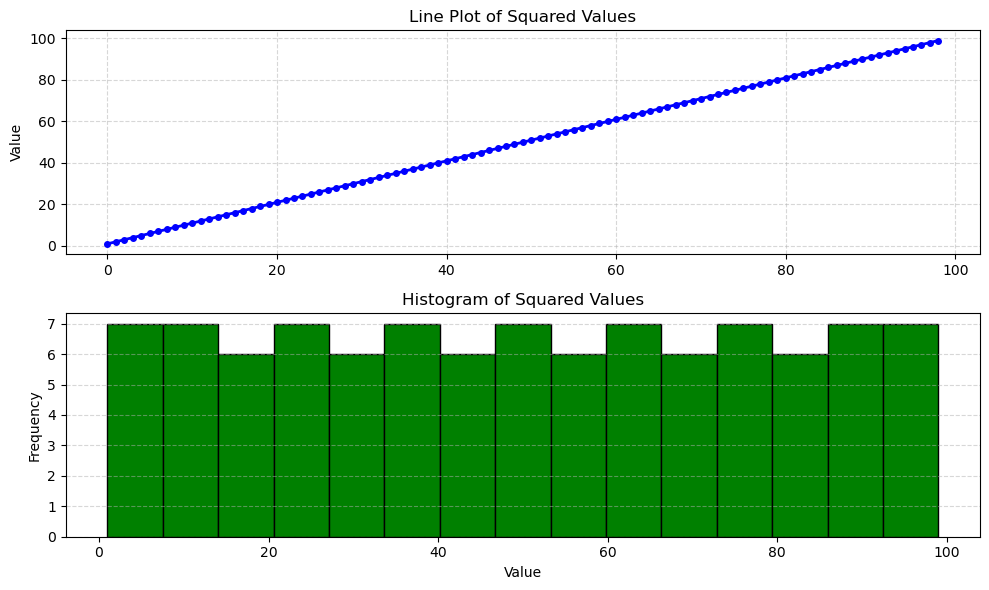

In [75]:
from numpy import sqrt

# square root transform a contrived quadratic time series
series = [i**2 for i in range(1,100)]

# sqrt transform
transform = sqrt(series)



# Create the figure
plt.figure(figsize=(10, 6))  # Wider and taller plot

# Line plot (top)
plt.subplot(2, 1, 1)                       
plt.plot(transform, color='blue', linewidth=2, marker='o', markersize=4)
plt.title('Line Plot of Squared Values')     
plt.ylabel('Value')                         
plt.grid(True, linestyle='--', alpha=0.5)    

# Histogram (bottom)
plt.subplot(2, 1, 2)                         
plt.hist(transform, bins=15, color='green', edgecolor='black')
plt.title('Histogram of Squared Values')     
plt.xlabel('Value')                          
plt.ylabel('Frequency')                      
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the combined plot
plt.tight_layout()
plt.show()

In [76]:
df['Sqrt'] = sqrt(df['Passengers'])

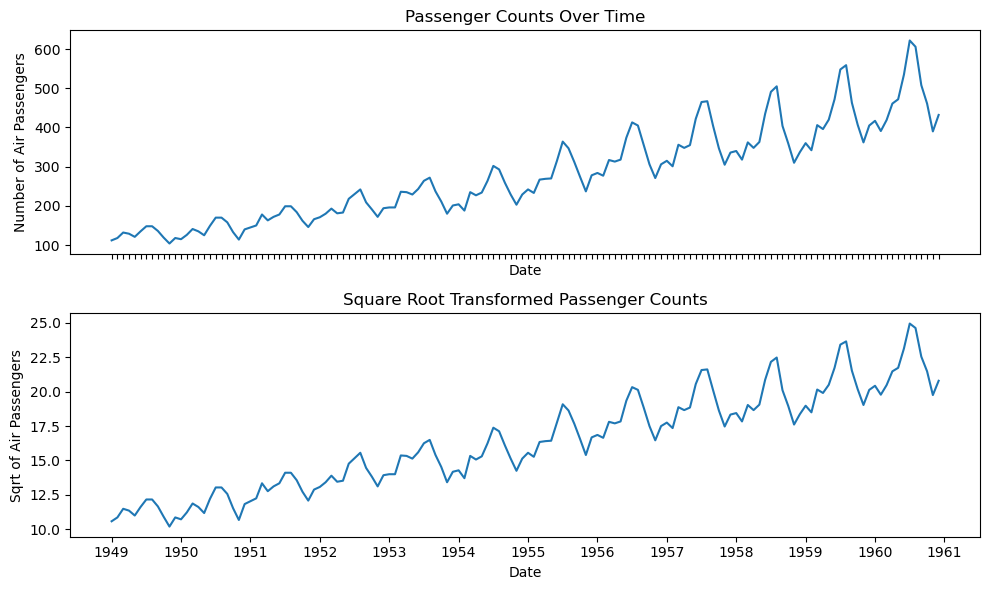

In [93]:
# Create the figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))  # 2 subplots in one figure

# Line plot (top)
ax1.plot(df['Month'], df['Passengers'])           # Plot passengers
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Air Passengers')
ax1.set_title('Passenger Counts Over Time')
ax1.tick_params(labelbottom=False) 


# Line plot (bottom)
ax2.plot(df['Month'], df['Sqrt'])                 # Plot square root transformed values
ax2.set_xlabel('Date')
ax2.set_ylabel('Sqrt of Air Passengers')
ax2.set_title('Square Root Transformed Passenger Counts')
plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))


# Adjust layout and show plot
plt.tight_layout()
plt.show();

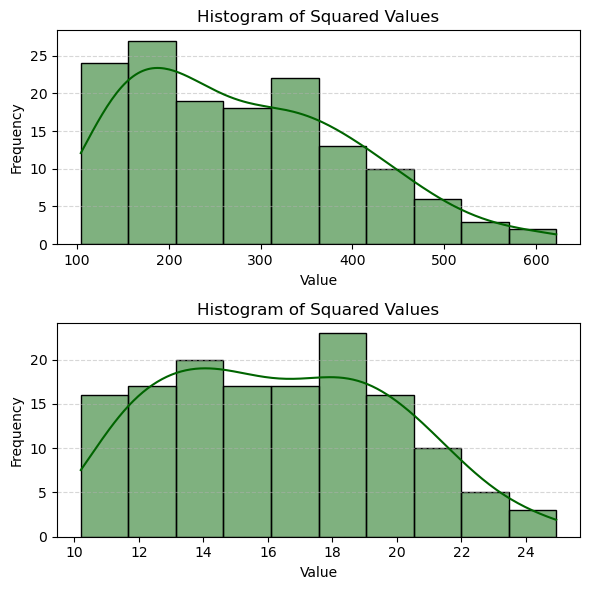

In [98]:
# Create the figure
plt.figure(figsize=(6, 6))

# Histogram (top)
plt.subplot(2, 1, 1)                                               
sns.histplot(df['Passengers'], bins=10, edgecolor='black', color='darkgreen', kde=True)
plt.title('Histogram of Squared Values')     
plt.xlabel('Value')                          
plt.ylabel('Frequency')                      
plt.grid(axis='y', linestyle='--', alpha=0.5)  

# Histogram (bottom)
plt.subplot(2, 1, 2)                         
sns.histplot(df['Sqrt'], bins=10, edgecolor='black', color='darkgreen', kde=True)
plt.title('Histogram of Squared Values')     
plt.xlabel('Value')                          
plt.ylabel('Frequency')                      
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the combined plot
plt.tight_layout()
plt.show()